In [31]:
import numpy as np

from HW2.benchmark_proceeder import BenchmarkStorage
from HW2.regression_generator import generate_regression
from HW2.sgd import scaled_mini
from HW2.visualization import visualize_regression_point, visualize_line, draw_levels

[ 28.4013462  -29.31261564]


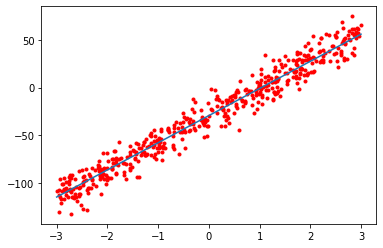

In [32]:
f, points, f_ab = generate_regression(f_scale=50, point_count=500, scale=np.array([3, 10]))

print(f_ab)

visualize_regression_point(f, points, scale=3)

In [33]:
storage = BenchmarkStorage()

# No scale (==1)

[ 28.56439353 -27.64022252]
Benchmark results for config <('mini5-scale1', 1, Default(no) optimization, Squared error calculator)>:
Mean time:1.231978
Mean memory:8.19kB
Mean SMAPE value:0.18382402894790859
Mean RMSE value:10.42032046659456
Mean logcosh value:7.581800870386217
Mean gradient calls:50700.0
Iterations done:1014.0


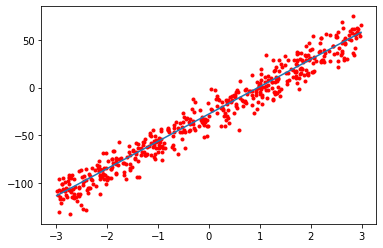

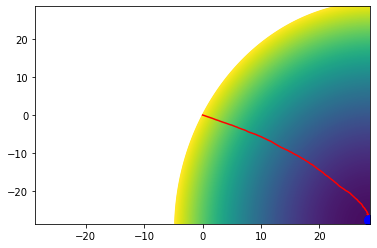

In [34]:
index = storage.add_benchmark_config(batch_size='mini5-scale1')
(ab, meta), ps = scaled_mini(points, batch_size=50, eps=5e-2, scale=1)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, ps)
draw_levels(ps, meta["points"])

# Scale (0.5 $\rightarrow$ 100)

[0.40997541 0.32056282]


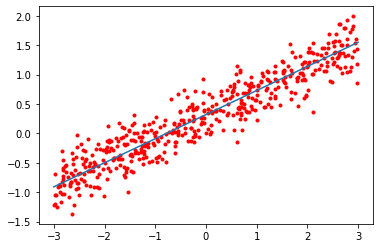

In [42]:
f, points, f_ab = generate_regression(f_scale=.5, point_count=500, scale=np.array([3, 0.25]))

print(f_ab)

visualize_regression_point(f, points, scale=3)

[78.51009741 55.45901442]
Benchmark results for config <('mini50-scale100', 1, Default(no) optimization, Squared error calculator)>:
Mean time:3.620962
Mean memory:0.0B
Mean SMAPE value:0.27068302447771
Mean RMSE value:51.3339480340505
Mean logcosh value:40.47672313903304
Mean gradient calls:143550.0
Iterations done:2871.0


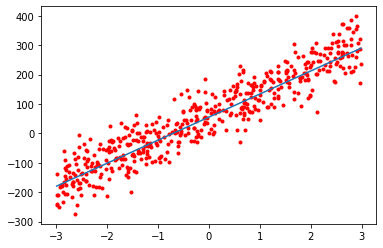

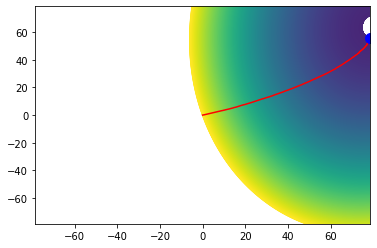

In [43]:
index = storage.add_benchmark_config(batch_size='mini50-scale100')
(ab, meta), ps = scaled_mini(points, batch_size=50, scale=200, eps=5e-2)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, ps)
draw_levels(ps, meta["points"])

#### Наблюдения
* Если изначальный разброс маленький, то градиент очень маленький и нам нехватает точности, чтобы прийти в минимум
* Для этого мы уыеличиваем `scale`, чтобы не "перескакивать" минимум
* Чтобы прийти в одну и ту же точку потребуется больше итераций

[ 495.0419719  -291.89888808]


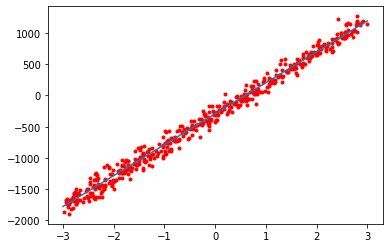

In [49]:
f, points, f_ab = generate_regression(f_scale=500, point_count=500, scale=np.array([3, 90]))

print(f_ab)

visualize_regression_point(f, points, scale=3)

# Scale (500 $\rightarrow$ 0.01)

[ 49.53012448 -29.94849076]
Benchmark results for config <('mini25-scale0.01', 1, Default(no) optimization, Squared error calculator)>:
Mean time:1.791932
Mean memory:8.19kB
Mean SMAPE value:0.09897873671256585
Mean RMSE value:9.0299173764616
Mean logcosh value:6.390981071375795
Mean gradient calls:68000.0
Iterations done:1360.0


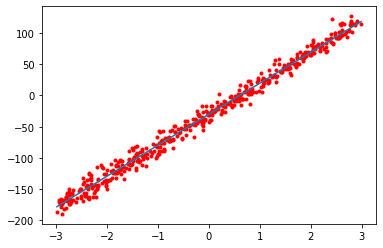

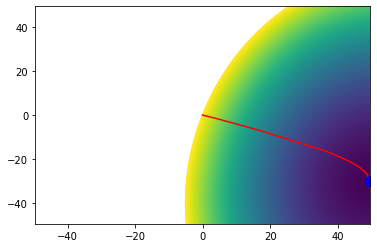

In [50]:
index = storage.add_benchmark_config(batch_size='mini25-scale0.01')
(ab, meta), ps = scaled_mini(points, batch_size=50, eps=2e-2, scale=0.1)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, ps)
draw_levels(ps, meta["points"])

#### Наблюдения

* Если разброс слишком большой, то для того, чтобы прийти в минимум, нам может не хватить нашего градиента т.к. минимум находится где-то "далеко"
* Для этого мы уменьшаем `scale` и делаем более "широкие" (в изначальном смысле) шаги
* Соответственно, чтобы прийти в одну и ту же точку, потребуется меньше итераций